In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/powell-menezes/SMS-Spam-Detection/master/spam.csv',encoding='latin-1')

In [3]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
df_sms=data
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df_sms=df_sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

drop unwanted columns

In [6]:

df_sms = df_sms.rename(columns={"v1":"label", "v2":"sms"})

In [7]:
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:

df_sms.shape

(5572, 2)

In [9]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


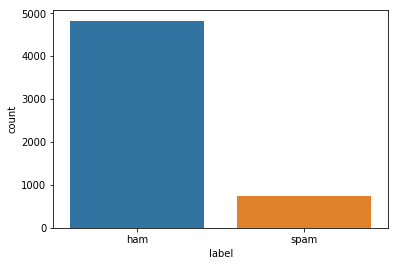

In [153]:
import seaborn as sns
sns.countplot(x="label", data=df_sms)

In [154]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [155]:
df_sms['length'] = df_sms['sms'].apply(len)
df_sms.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5cc0f83630>,
      dtype=object)

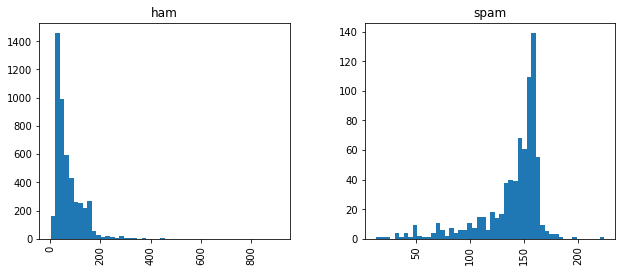

In [156]:
df_sms.hist(column='length', by='label', bins=50,figsize=(10,4))


changing label values to 0 and 1

In [157]:
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


splitting data into train and test (80-20)

In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)


processing data using CountVectorizer and TfidfVectorizer which will be the input for algorithm

In [0]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler

count_vector = CountVectorizer()
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)
# count and fit
# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [160]:
X_train.head(2)

1642                             Sleeping nt feeling well
2899    Come aftr  &lt;DECIMAL&gt; ..now i m cleaning ...
Name: sms, dtype: object

In [161]:
pd.set_option('display.max_columns',None)
a=training_data.toarray()

a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [162]:

a[0]

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
count_vector.inverse_transform(a[0])

[array(['feeling', 'nt', 'sleeping', 'well'], dtype='<U34')]

In [0]:
count_vector=TfidfVectorizer(stop_words='english')

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

In [165]:
count_vector.vocabulary_

{'sleeping': 6051,
 'nt': 4734,
 'feeling': 2739,
 'come': 1861,
 'aftr': 846,
 'lt': 4152,
 'decimal': 2162,
 'gt': 3179,
 'cleaning': 1794,
 'house': 3431,
 'sec': 5814,
 'yeah': 7437,
 'probably': 5280,
 'earlier': 2453,
 'hello': 3312,
 'love': 4130,
 'doing': 2353,
 'did': 2254,
 'interview': 3620,
 'today': 6752,
 'happy': 3252,
 'good': 3101,
 'boy': 1430,
 'think': 6666,
 'missing': 4412,
 '2mro': 408,
 'coming': 1867,
 'gym': 3203,
 'machan': 4195,
 'goodnight': 3107,
 'free': 2908,
 'ring': 5634,
 'tone': 6770,
 'just': 3779,
 'text': 6620,
 'polys': 5154,
 '87131': 686,
 'week': 7217,
 'new': 4654,
 '0870737910216yrs': 89,
 '50': 535,
 'wk': 7314,
 'camera': 1584,
 'awarded': 1136,
 'sipix': 6016,
 'digital': 2273,
 '09061221066': 192,
 'fromm': 2942,
 'landline': 3913,
 'delivery': 2194,
 '28': 382,
 'days': 2139,
 'tbs': 6559,
 'persolvo': 5022,
 'chasing': 1700,
 'sept': 5865,
 'forå': 2895,
 '38': 457,
 'definitely': 2181,
 'paying': 4985,
 'thanks': 6633,
 'information'

In [166]:
pd.set_option('display.max_columns',None)
a=training_data.toarray()

a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [167]:
a[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [168]:
count_vector.inverse_transform(a[0])

[array(['feeling', 'nt', 'sleeping'], dtype='<U34')]

In [169]:
X_train.iloc[0]

'Sleeping nt feeling well'

building MultinomialNB model

In [170]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()

naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predictions = naive_bayes.predict(testing_data)

In [0]:
actual=np.array(y_test)

In [173]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [174]:
c=0
for i in range(len(predictions)):
  if predictions[i]==actual[i]:
    c=c+1
c

1093

In [175]:
len(predictions)

1115

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))


Accuracy score: 0.9802690582959641
Precision score: 1.0
Recall score: 0.841726618705036
F1 score: 0.9140624999999999


In [177]:

from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       976
           1       1.00      0.84      0.91       139

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [178]:
metrics.confusion_matrix(y_test, predictions)

array([[976,   0],
       [ 22, 117]])

In [179]:
X_test.iloc[0]

'Convey my regards to him'

In [180]:
predictions = naive_bayes.predict(testing_data[0])
predictions

array([0])

In [181]:

X_test.iloc[1]
predictions = naive_bayes.predict(testing_data[1])
predictions

array([0])

In [182]:
print(X_test.iloc[30])
predictions = naive_bayes.predict(testing_data[30])
predictions

I emailed yifeng my part oredi.. Can Ì_ get it fr him..


array([0])

I have built and model with overall 98% accuracy 

In [0]:
ham_words = ''
spam_words = ''
spam = df_sms[df_sms['label']==1]
ham =df_sms[df_sms['label']==0]

In [184]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
spam_words=''
ham_words=''
for msg in spam['sms']:
    text=re.sub('[^a-zA-Z]',' ',msg)
    text = text.lower()
    text=text.split()
    text=[word for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        spam_words = spam_words+words+' '
        
for msg in ham['sms']:
    text=re.sub('[^a-zA-Z]',' ',msg)
    text = text.lower()
    text=text.split()
    text=[word for word in text if not word in set(stopwords.words('english'))]
    for words in text:
        ham_words = ham_words+words+' '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from wordcloud import WordCloud

In [0]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=1200, height=720).generate(spam_words)


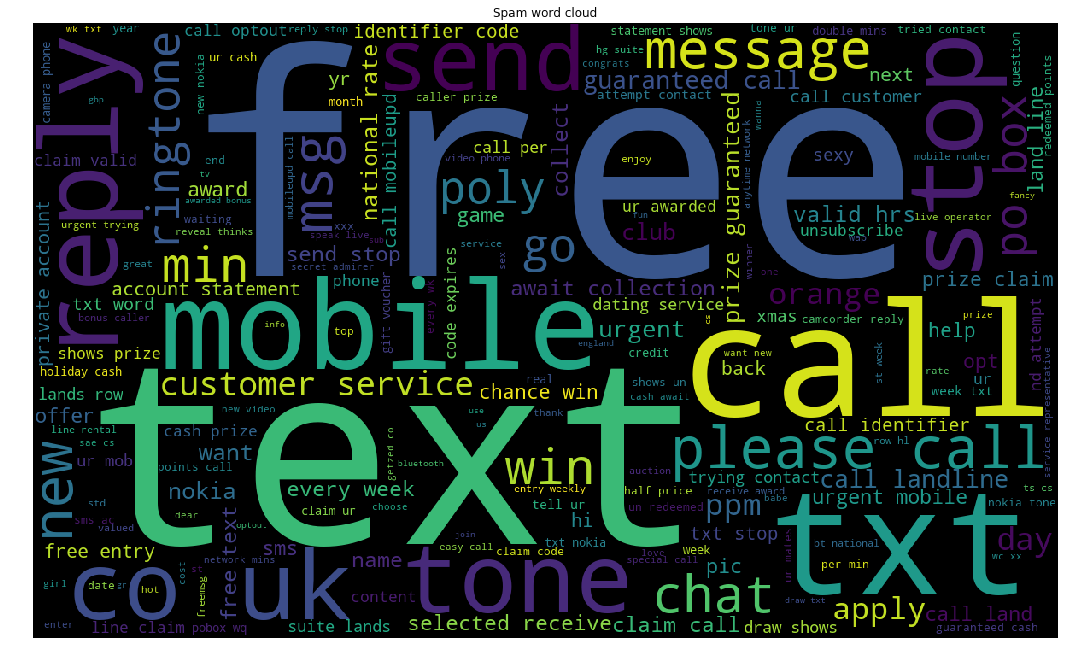

In [187]:
#Spam Word cloud
plt.figure( figsize=(16,9), facecolor='w')
plt.imshow(spam_wordcloud)
plt.title('Spam word cloud')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()